In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os, shutil
import glob
from pathlib import Path
import splitfolders
import random
from sklearn import preprocessing

## MRL-Eye Dataset

the dataset consists of 84,898 images from 37 subjects 

Image shape 86 x 86 ; Label : eye state [0 - closed, 1 - open]

Eye images were obtained using the eye detector based on the histogram of oriented gradients (HOG) combined with the SVM classifier

Source: http://mrl.cs.vsb.cz/eyedataset

# Data Preprocessing and splitting into train, test, val

In [ ]:
# dir = "Datasets"
# open_eyes = glob.glob(dir + "/mrlEyes_2018_01/*/*_*_*_*_1_*_*_*.png",recursive=True)
# closed_eyes = glob.glob(dir + "/mrlEyes_2018_01/*/*_*_*_*_0_*_*_*.png",recursive=True)

# Path(dir+"/MRL").mkdir(parents=True, exist_ok=True)
# Path(dir+"/MRL/Open_Eyes").mkdir(parents=True, exist_ok=True)
# Path(dir+"/MRL/Closed_Eyes").mkdir(parents=True, exist_ok=True)

# for file in open_eyes:
#     shutil.copy(file, dir+"/MRL/Open_Eyes")
    
# for file in closed_eyes:
#     shutil.copy(file, dir+"/MRL/Closed_Eyes")

## Reading Dataset

In [ ]:
# input_dir = "Datasets/MRL"
# output_dir = "Datasets/MRL"

# splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(0.6, 0.2,0.2))

Copying files: 84898 files [01:30, 935.13 files/s] 


In [2]:
dir = "Datasets/MRL"
labels = {"Closed_Eyes":0,"Open_Eyes":1}
img_size = 224

In [51]:
def create_dataset(folder): 
    # load images from the folder
    # resize the images
    # normalise the data
    
    labels = {"Closed_Eyes":0,"Open_Eyes":1}
    img_size = 224
    images = []
    X = []
    y = []
    
    for label in labels:
        img_class = labels[label]
        path = folder+"/"+label
        for filename in os.listdir(path):
            try:
                img = cv2.imread(os.path.join(path,filename), cv2.IMREAD_GRAYSCALE)
                norm_img = cv2.normalize(img, None, alpha=0, beta=1, 
                                           norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                rgb = cv2.cvtColor(norm_img,cv2.COLOR_GRAY2RGB)
                img = cv2.resize(rgb, (img_size,img_size))            
                images.append([img,img_class])
                
            except Exception as e:
                pass
      
    random.shuffle(images)

    # split shuffled images and labels 
    for features, label in images:
        X.append(features)
        y.append(label)

    # reshape images
    X = np.array(X).reshape(-1,img_size,img_size,3)
    y = np.array(y)
        
    return (X,y)

# Create Training Dataset

In [52]:
(X_test, y_test) = create_dataset(dir+"/test") 

In [ ]:
(X_train, y_train) = create_dataset(dir+"/train") 

In [81]:
(X_val, y_val) = create_dataset(dir+"/val") 

In [1]:
# Save data

import pickle

with open('X_test.pickle','wb') as handle:
    pickle.dump(X_test, handle)
    
with open('y_test.pickle','wb') as handle:
    pickle.dump(y_test, handle)
    

    
with open('X_train.pickle','wb') as handle:
    pickle.dump(X_train, handle)
    
with open('y_train.pickle','wb') as handle:
    pickle.dump(y_train, handle)
    

    
with open('X_val.pickle','wb') as handle:
    pickle.dump(X_val, handle)
    
with open('y_val.pickle','wb') as handle:
    pickle.dump(y_val, handle)

NameError: name 'X_test' is not defined

In [2]:
# load data

import pickle

with open('X_test.pickle','rb') as handle:
    X_test = pickle.load(handle)
    
with open('y_test.pickle','wb') as handle:
    y_test = pickle.load(handle)
    

    
with open('X_train.pickle','wb') as handle:
    X_train = pickle.load(handle)
    
with open('y_train.pickle','wb') as handle:
    y_train = pickle.load(handle)
    

    
with open('X_val.pickle','wb') as handle:
    X_val = pickle.load(handle)
    
with open('y_val.pickle','wb') as handle:
    y_val = pickle.load(handle)

UnsupportedOperation: read

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


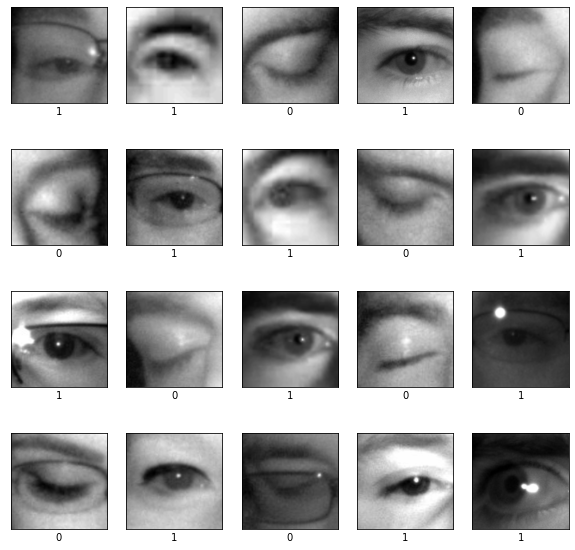

In [82]:
#check data by plotting first 20 images

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_val[i])
    plt.xlabel(y_val[i])
plt.show()


## Create Model

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet import MobileNet

In [ ]:
model = MobileNet()
model.summary()

In [ ]:
base_input = model.layers[0].input
base_output = model.layers[-4].output

flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()

In [18]:
new_model.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])

In [ ]:
new_model.fit(X_train, y_train, epochs=2, validation_data=)

In [19]:
new_model.save('model.h5')

In [ ]:
new_model = tf.keras.models.load_model('dl_model.h5')

# Test the Model

In [ ]:
test_img = cv2.imread('path', cv2.IMREAD_GRAYSCALE)
rgb = cv2.cvtColor(test_img,cv2.COLOR_GRAY2RGB) #convert to RGB
new_array = cv2.resize(rgb,(img_size,img_size))



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(200, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model.fit(...)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit(...)